# Discrete Probability Revisited

### Dependent variables and Conditional probabilty

#### Not all probabilities are independent -- here's an example:

I am allergic to dogs. (Sad but true.)  They make me sneeze.
Sometimes dogs say hello to me.  What is the probability that I sneeze?

Here I know some probabilities about the friendliness of dogs:
- $P(``\text{Dog greets me}") = 1/4$ 
- $P(``\text{Dog doesn't greet me}") = 3/4$ 

Sometimes we know the **conditional probabilities** that depend on whether dogs say hello:
- $P(``\text{I sneeze}" |\, ``\text{Dog greets me}") = 9/10$
- $P(``\text{I don't sneeze}" |\, ``\text{Dog greets me}") = 1/10$
- $P(``\text{I sneeze}" |\, ``\text{Dog doesn't greet me}") = 2/10$
- $P(``\text{I don't sneeze}" |\, ``\text{Dog doesn't greet me}") = 8/10$

How can I find the probability of sneezing in general?
$$ $$
\begin{align}
P(``\text{I sneeze}") 
&= P(``\text{I sneeze}" |\, ``\text{Dog greets me}") \times P(``\text{Dog greets me}") 
\\
&= P(``\text{I sneeze}" |\, ``\text{Dog doesn't greet me}") \times P(``\text{Dog doesn't greet me}") 
\\
&= \frac{9}{10} \times \frac{1}{4} + \frac{2}{10} \times \frac{3}{4}
\\
&= \frac{9 + 6}{40} = \frac{3}{8} = 37.5\%
\end{align}

What does the probability space look like?  **DRAW IT!**

Note that $P(``\text{I sneeze}")$ depends on the value of $``\text{Dog greets me}"$!
  
   **The random variables "I sneeze" and "Dog greets me" are not independent!**
  
If we thought they were independent, we would conclude that the probabilty 
  that I sneeze when a dog greets me is $\frac{1}{4} \cdot \frac{3}{8} = \frac{3}{32} \approx 9.3\%$, 
  but its actually $\frac{1}{4} \cdot \frac{9}{10} = 22.5\%$!


##An important Probability theorem:

**Law of Large Numbers (LLN informal)** -- The average value of a large number of independent 
samples of a random variable $X$ gets arbitrarily close to its expected value $E(X)$.

**Law of Large Numbers (LLN formal)** -- Suppose that $X_1, ..., X_n$ are independent random 
variables with the same probability densities as the random variable $X$, then 

$$
\lim_{n \rightarrow \infty} \frac{X_1 + X_2 + \cdots + X_n}{n} = E(X).
$$



In [6]:
## Let's do an example -- rolling many dice!
D_list = [make_die()]
for i in range(10):
    D_list.append(make_sum_of_two_variables(D_list[-1], D_list[-1]))

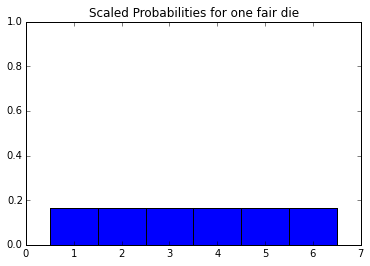

In [23]:
## Try varying 0 <= k <= 10
k = 0
RV_mean_scaled_histogram(D_list[k],n = 2**k)

In [12]:
## Python Code to create and view probability distributions!

%matplotlib inline
import matplotlib.pyplot as plt


## PROBABILITIES FOR A FAIR DIE
def make_die(d = 6):
    RV = {}
    for val in range(1,d+1):
        RV[val] = 1.0/6    
    return RV


def make_sum_of_two_variables(V1, V2):
    """
    RV = ([val_list], [prob_list])    
    """
    new_V = {}
    for v1 in V1:
        for v2 in V2:            
            new_V[v1 + v2] = new_V.get(v1 + v2, 0) + V1[v1] * V2[v2]

    ## Adjust for roundoff error -- Rescale the probabilities to sum to one
    inv_prob_sum = 1.0 / sum(new_V.values())
    for k in new_V:
        new_V[k] *= inv_prob_sum 
        
    return new_V
            

def RV_mean(V):
    """
    Return the mean of the random variable.    
    """
    mean = 0.0
    for val, prob in V.iteritems():
        mean += prob * val
    return mean

    
def RV_histogram(V, n):
    
    Vals = V.keys()
    Probs = [V[val] for val in Vals]
    d = len(Vals)
    Left = Vals
    
    ## Plot the histogram
    fig = plt.figure()
    H = plt.bar(Left, Probs, align='center', width = 1.0)
    H = plt.xticks(Left, Vals)
    H = plt.ylim((0,1))
    if n == 1:
        H = plt.title("Probabilities for one fair die")
    else:
        H = plt.title("Probabilities for the sum of " + str(n) + " fair dice")
        
    
def RV_histogram__dots(V, n):
    
    Vals = V.keys()
    Probs = [V[val] for val in Vals]
    d = len(Vals)
    Left = Vals
    
    ## Plot the histogram
    fig = plt.figure()
    H = plt.plot(Left, Probs, 'bo')
    H = plt.xticks(Left, Vals)
    H = plt.ylim((0,1))
    x_min, x_max = plt.xlim()  
    eps = 0.5
    H = plt.xlim([x_min - eps, x_max + eps])
    if n == 1:
        H = plt.title("Probabilities for one fair die")
    else:
        H = plt.title("Probabilities for the sum of " + str(n) + " fair dice")
        
    
def RV_mean_scaled_histogram(V, n, use_unscaled_xticks=True):
    
    mean = RV_mean(V)

    Vals = V.keys()
    Scaled_Vals = [1.0 * v / n   for v in V.keys()]
    Probs = [n*V[val] for val in Vals]
    max_prob = max(Probs + [1])
    d = len(Vals)
    Left = Vals
    Scaled_Left = Scaled_Vals
    
    ## Plot the histogram
    fig = plt.figure()
    H = plt.bar(Scaled_Left, Probs, align='center', width=1.0/n)
    if not use_unscaled_xticks:
        H = plt.xticks(Scaled_Left, Scaled_Vals)
    H = plt.ylim((0,max_prob))
    if n == 1:
        H = plt.title("Scaled Probabilities for one fair die")
    else:
        H = plt.title("Scaled Probabilities for the sum of " + str(n) + " fair dice")